In [1]:
import seaborn as sns

In [9]:
df2 = sns.load_dataset('titanic')

Data Preprocessing

In [10]:
df2 = df2.dropna(subset=['age', 'fare', 'embarked', 'who', 'survived'])

We are removing rows that have missing values in critical columns that we plan to use as features/target in the model

In [11]:
df2['who'] = df2['who'].map({'man': 0, 'woman': 1, 'child': 2})


We are encoding categorical variables into numerical variables so that we can use different ML models to compute values

In [12]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,0,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,1,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,1,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,1,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,0,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,Q,Third,1,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,S,Second,0,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,S,First,1,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,C,First,0,True,C,Cherbourg,yes,True


In [13]:
df2['embarked'] = df2['embarked'].map({'S': 0, 'C': 1, 'Q': 2})

In [14]:
df2

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,0,Third,0,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,1,First,1,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,0,Third,1,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,0,First,1,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,0,Third,0,True,NaN,Southampton,no,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
885,0,3,female,39.0,0,5,29.1250,2,Third,1,False,NaN,Queenstown,no,False
886,0,2,male,27.0,0,0,13.0000,0,Second,0,True,NaN,Southampton,no,True
887,1,1,female,19.0,0,0,30.0000,0,First,1,False,B,Southampton,yes,True
889,1,1,male,26.0,0,0,30.0000,1,First,0,True,C,Cherbourg,yes,True


In [15]:
X = df2[['age', 'fare', 'who', 'embarked']] #features
y = df2[['survived']] #target



In [16]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

When we rerun the code, we are able to reproduce the same split of test and train data

In [17]:
from sklearn.linear_model import LogisticRegression

In [18]:
model = LogisticRegression()
model.fit(X_train, y_train)


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()



*   Instead of drawing a line like linear regression, Logistic Regression draws an S-shaped curve that marks probabilities between 0 and 1
*   We set a threshold, usually 0.5, to decide between classes

*   Sigmoid function is used to determine the probabilities





In [20]:
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
import matplotlib.pyplot as plt

<function matplotlib.pyplot.show(close=None, block=None)>

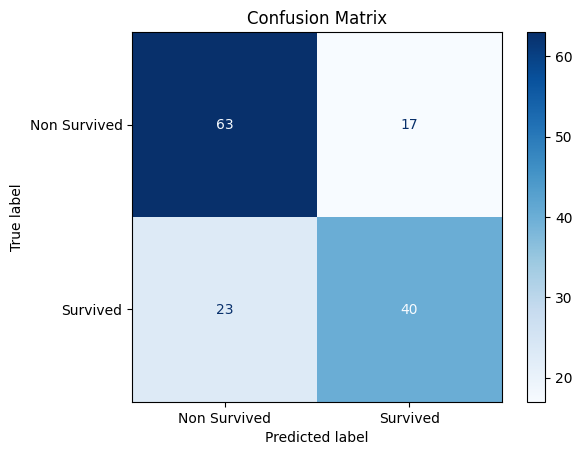

In [23]:
y_pred = model.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Non Survived", "Survived"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show



*   TP means that the model correctly predicted that the person survived
* TN means that the model correctly predicted that the person did not survive
*  FP means that the model incorrectly predicted that the pearson survived
*  FN means that the model incorrectly predicted that the pearson did not survive
* TP = 40
* TN = 63
* FP = 17
* FN = 23



In [24]:
from sklearn.metrics import accuracy_score

In [25]:
print("Accuracy: ", accuracy_score(y_test, y_pred))

Accuracy:  0.7202797202797203




*   Accuracy Score is (TP + TN) / (TP + TN + FP + FN)
*   Accuracy is simple and useful but it can be misleading for imbalanced datasets

